In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
df = pd.read_csv("customer_data.csv")

In [6]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASES                 8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONE_OFF_PURCHASES                     0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONE_OFF_PURCHASES_FREQUENCY           0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.drop('CUST_ID', axis=1, inplace=True)

In [10]:
# Handle missing values
X=df.fillna(df.mean())

In [17]:
from sklearn.cluster import KMeans
wcss = []
k_range = range(1,11)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # KMeans.inertia_ calculates the sum of the distances of all points within a cluster from the centroid.

wcss

[152150.00000000006,
 128957.90955338099,
 112609.0107122191,
 105366.56908176858,
 92157.23090613534,
 84852.59400226278,
 80786.09414150054,
 76542.39710611738,
 71729.80111888576,
 66612.69244066977]

In [22]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# initialize the k-means model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit and predict the clusters
y_km = kmeans.fit_predict(X_scaled)
print(y_km)

[3 0 2 ... 2 3 4]


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)
print(X_pca)
# check the explained variance ratio
print("Explained Variance Ratio: ", pca.explained_variance_ratio_)

[[-1.68222026 -1.07645061]
 [-1.1382949   2.50647666]
 [ 0.96968401 -0.3835203 ]
 ...
 [-0.92620364 -1.8107856 ]
 [-2.33655167 -0.65796601]
 [-0.55642216 -0.40046712]]
Explained Variance Ratio:  [0.27290037 0.20301991]


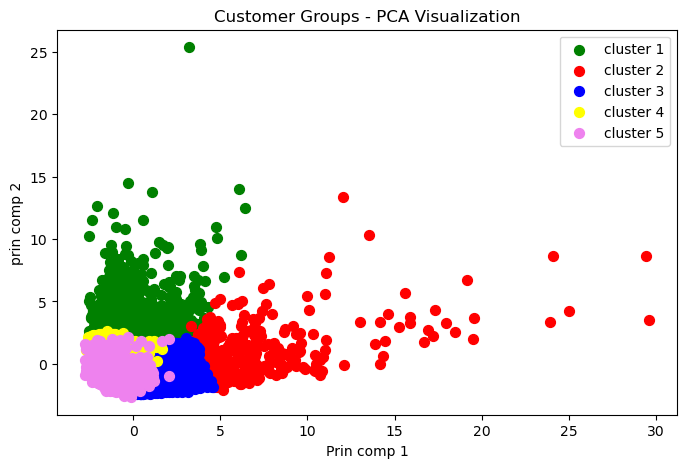

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(X_pca[y_km==0,0], X_pca[y_km==0,1], s=50, c='green',label='cluster 1')
plt.scatter(X_pca[y_km==1,0], X_pca[y_km==1,1], s=50, c='red',label='cluster 2')
plt.scatter(X_pca[y_km==2,0], X_pca[y_km==2,1], s=50, c='blue',label='cluster 3')
plt.scatter(X_pca[y_km==3,0], X_pca[y_km==3,1], s=50, c='yellow',label='cluster 4')
plt.scatter(X_pca[y_km==4,0], X_pca[y_km==4,1], s=50, c='violet',label='cluster 5')

plt.title('Customer Groups - PCA Visualization')
plt.xlabel('Prin comp 1')
plt.ylabel('prin comp 2')
plt.legend()
plt.show()

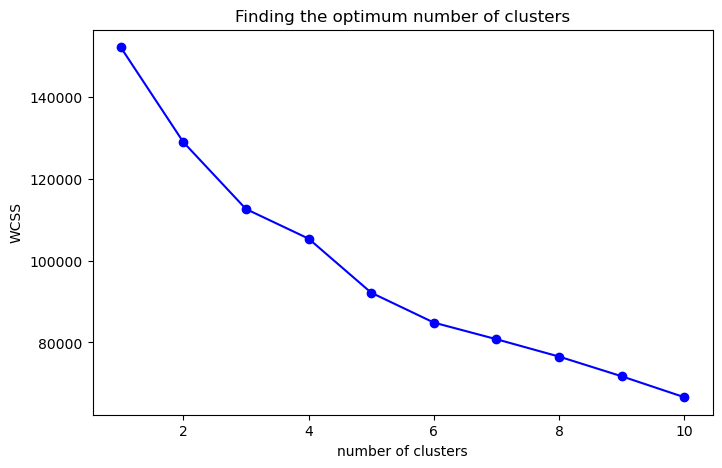

In [16]:
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss,'bo-')
plt.title('Finding the optimum number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
df['Cluster'] = y

In [32]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONE_OFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONE_OFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


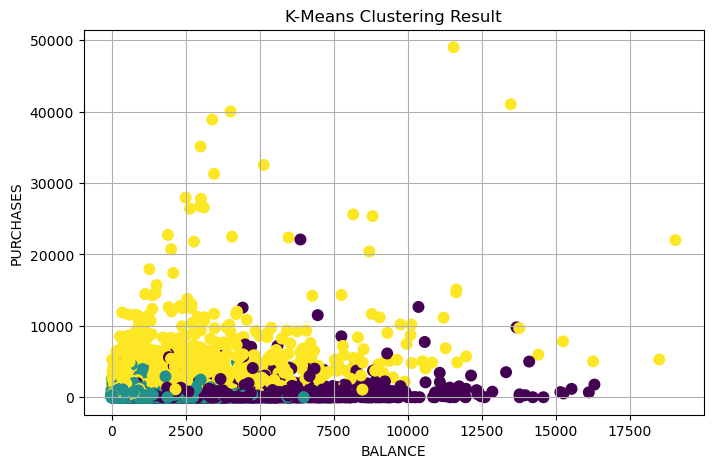

In [31]:
plt.figure(figsize=(8, 5))
plt.scatter (df['BALANCE'], df['PURCHASES'], c=y, cmap='viridis', s=58)
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('K-Means Clustering Result')
plt.grid(True)
plt.show()